In [44]:
# Weekly Metrics

In [54]:
library(ggplot2)
library(scales)

In [46]:
# load data

log <-data.frame(Date = c("2013/05/25","2013/05/28","2013/05/31","2013/06/01","2013/06/02","2013/06/05","2013/06/07"),
                 Quantity = c(9,1,15,4,5,17,18))
log
str(log)

Date,Quantity
2013/05/25,9
2013/05/28,1
2013/05/31,15
2013/06/01,4
2013/06/02,5
2013/06/05,17
2013/06/07,18


'data.frame':	7 obs. of  2 variables:
 $ Date    : Factor w/ 7 levels "2013/05/25","2013/05/28",..: 1 2 3 4 5 6 7
 $ Quantity: num  9 1 15 4 5 17 18


In [47]:
# convert date variable from factor to date format:
log$Date <- as.Date(log$Date,
  "%Y/%m/%d") # tabulate all the options here
str(log) 

'data.frame':	7 obs. of  2 variables:
 $ Date    : Date, format: "2013-05-25" "2013-05-28" ...
 $ Quantity: num  9 1 15 4 5 17 18


In [48]:
str(log)

'data.frame':	7 obs. of  2 variables:
 $ Date    : Date, format: "2013-05-25" "2013-05-28" ...
 $ Quantity: num  9 1 15 4 5 17 18


In [49]:
# create variables of the week and month of each observation:
log$Month <- as.Date(cut(log$Date,
  breaks = "month"))
log$Week <- as.Date(cut(log$Date,
  breaks = "week",
  start.on.monday = FALSE)) # changes weekly break point to Sunday
log

Date,Quantity,Month,Week
2013-05-25,9,2013-05-01,2013-05-19
2013-05-28,1,2013-05-01,2013-05-26
2013-05-31,15,2013-05-01,2013-05-26
2013-06-01,4,2013-06-01,2013-05-26
2013-06-02,5,2013-06-01,2013-06-02
2013-06-05,17,2013-06-01,2013-06-02
2013-06-07,18,2013-06-01,2013-06-02


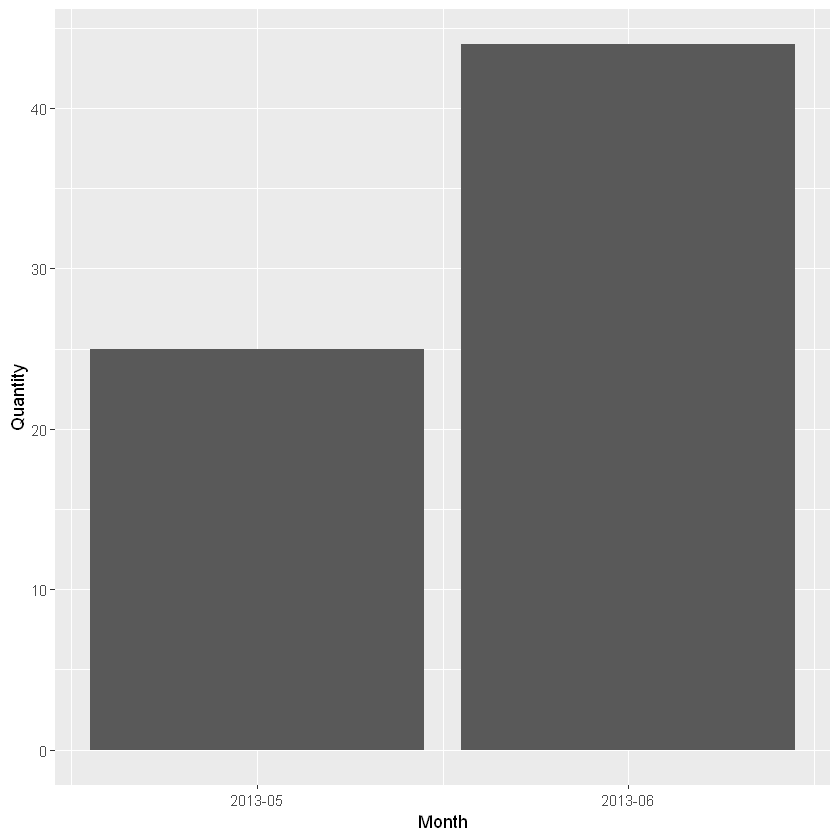

In [50]:
# graph by month:
ggplot(data = log,
  aes(Month, Quantity)) +
  stat_summary(fun = sum, # adds up all observations for the month
    geom = "bar") + # or "line"
  scale_x_date(
    labels = date_format("%Y-%m"),
    breaks = "1 month") # custom x-axis labels

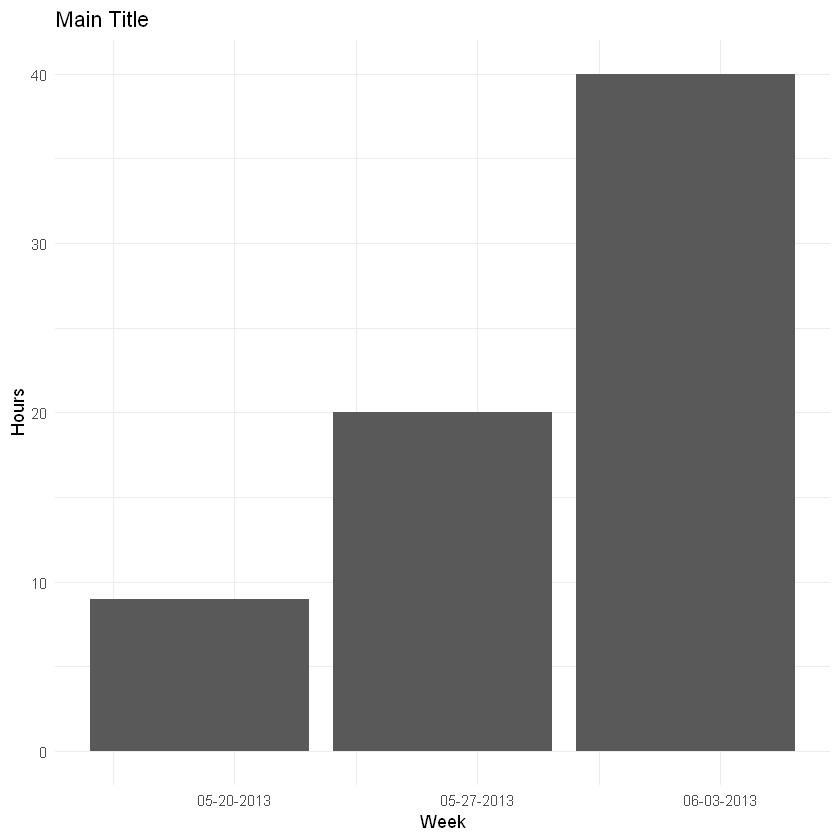

In [73]:
# graph by week:
p <- ggplot(data = log,
  aes(Week, Quantity)) +
  stat_summary(fun = sum, # adds up all observations for the week
    geom = "bar") + # or "line"
  scale_x_date(
    labels = date_format("%m-%d-%Y"),
    breaks = "1 week") # custom x-axis labels

p.labs <- r + theme_minimal() + labs(title = "Main Title", x = "Week", y = "Hours")
p.labs
